In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import scipy
import sklearn
import xgboost

import torch
import torchvision
import torchaudio
import tensorflow

In [3]:
from ucimlrepo import fetch_ucirepo
# fetch dataset 
iris = fetch_ucirepo(id=53) #iris
handwritten_digits = fetch_ucirepo(id=80) 
spambase = fetch_ucirepo(id=94) 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)


# df = cdc_diabetes_health_indicators
# # data (as pandas dataframes) 
# X = df.data.features 
# y = df.data.targets 
  
# # # metadata 
# print(df.metadata) 
  
# # variable information 
# print(df.variables) 

In [4]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "train_u6lujuX_CVtuZ9i (1).csv"

# Load the latest version
loan = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "ninzaami/loan-predication",
  file_path
)

In [5]:
print(loan.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [6]:
print(len(loan[loan["Loan_Status"]=="Y"]))
print(len(loan[loan["Loan_Status"]=="N"]))
loan.info()

422
192
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


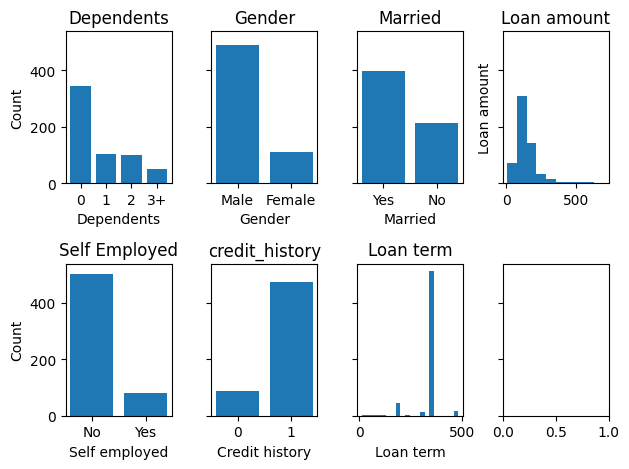

In [31]:

# loan["Dependents"].fillna("0",inplace=True)

dependents = loan["Dependents"].value_counts()
gender = loan["Gender"].value_counts()
married = loan["Married"].value_counts()
self_employed = loan["Self_Employed"].value_counts()
credit_history = loan["Credit_History"].value_counts()
loan_term = loan["Loan_Amount_Term"].value_counts()

fig,ax = plt.subplots(2,4,sharey=True)
ax[0,0].set_title("Dependents")
ax[0,0].bar(dependents.index, dependents.values)
ax[0,0].set_ylabel("Count")
ax[0,0].set_xlabel("Dependents")

ax[0,1].set_title("Gender")
ax[0,1].bar(gender.index,gender.values)
ax[0,1].set_xlabel("Gender")

ax[0,2].set_title("Married")
ax[0,2].bar(married.index,married.values)
ax[0,2].set_xlabel("Married")

ax[0,3].set_title("Loan amount")
ax[0,3].hist(loan["LoanAmount"])
ax[0,3].set_ylabel("Loan amount")

ax[1,0].set_title("Self Employed")
ax[1,0].set_ylabel("Count")
ax[1,0].set_xlabel("Self employed")
ax[1,0].bar(self_employed.index, self_employed.values)

ax[1,1].set_title("credit_history")
ax[1,1].set_xlabel("Credit history")
ax[1,1].bar(credit_history.index,credit_history.values)

ax[1,2].set_title("Loan term")
ax[1,2].set_xlabel("Loan term")
# ax[1,2].bar(loan_term.index,loan_term.values)
ax[1,2].hist(loan["Loan_Amount_Term"], bins=20)

plt.tight_layout()
plt.show()

In [28]:
print(loan["Loan_Amount_Term"].value_counts())

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64
